In [2]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import os

In [3]:
import tensorflow as tf 
from tensorflow import keras 

C:\Users\w530\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\w530\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\w530\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\w530\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

## Data is divided into three parts 
### 1) Training (2000 cats, 2000dogs)
### 2) Testing (500 cats, 500 dogs) 
### 3) Validation(500 cats, 500 dogs) 

In [4]:
train_dir = r"D:\Krusha's Github projects\CNN_CatsAndDogs_dataAugmentation_trasnferLearning\Data\train"
validation_dir = r"D:\Krusha's Github projects\CNN_CatsAndDogs_dataAugmentation_trasnferLearning\Data\validation"
test_dir = r"D:\Krusha's Github projects\CNN_CatsAndDogs_dataAugmentation_trasnferLearning\Data\test"

 # Data Preprocessing 
 
 #### -> Read the picture files.
 #### -> Decode the JPEG content to RGB grid of pixels.
 #### -> Convert these into floating point tensors.
 #### -> Rescale the pixel values (between 0 and 255) to the [0,1] interval.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (150,150),
        batch_size = 20,
        class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150,150),
        batch_size = 20,
        class_mode = "binary")



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models 

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation="relu",
                       input_shape=(150,150,3))) 
model.add(layers.MaxPooling2D((2,2))) 

model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation="relu"))

model.add(layers.Dense(1, activation="sigmoid"))

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)      

In [14]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = 100,
        epochs = 20,
        validation_data = validation_generator,
        validation_steps = 50)

Epoch 1/20
100/100 [==============================] - 76s 759ms/step - loss: 0.6882 - acc: 0.5305 - val_loss: 0.6748 - val_acc: 0.5310
Epoch 2/20
100/100 [==============================] - 82s 825ms/step - loss: 0.6616 - acc: 0.6150 - val_loss: 0.6464 - val_acc: 0.6120
Epoch 3/20
100/100 [==============================] - 90s 900ms/step - loss: 0.6112 - acc: 0.6715 - val_loss: 0.7055 - val_acc: 0.5840
Epoch 4/20
100/100 [==============================] - 108s 1s/step - loss: 0.5724 - acc: 0.7075 - val_loss: 0.5841 - val_acc: 0.6920
Epoch 5/20
100/100 [==============================] - 122s 1s/step - loss: 0.5415 - acc: 0.7315 - val_loss: 0.5661 - val_acc: 0.6980
Epoch 6/20
100/100 [==============================] - 117s 1s/step - loss: 0.5093 - acc: 0.7480 - val_loss: 0.5527 - val_acc: 0.7140
Epoch 7/20
100/100 [==============================] - 120s 1s/step - loss: 0.4787 - acc: 0.7630 - val_loss: 0.5444 - val_acc: 0.7180
Epoch 8/20
100/100 [==============================] - 143s 1s/s

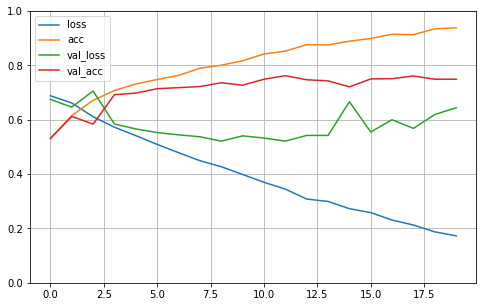

In [17]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Now it can be seen that accuracy curve greater than validation accuracy curve , that idicates overfitting. 
### To overcome this more data is required 

In [18]:
model.save("model.h5")

In [19]:
from tensorflow.keras import backend as K 

K.clear_session()

# Now augmenting Images 

In [20]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,)

#  
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150,150),
            batch_size=32,
            class_mode="binary")

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150,150),
        batch_size = 20,
        class_mode = "binary")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation="relu",
                       input_shape=(150,150,3))) 
model.add(layers.MaxPooling2D((2,2))) 

model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation="relu"))

model.add(layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics=['acc'])